#                           Data Project - Stock Market Analysis

### we are going to analysis on this stock market data and answer few questions

## READING DATA

In [1]:
import pandas as pd
amd = pd.read_csv('AMD.csv')

In [2]:
amd.head(n=3)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2005-01-03,22.110001,22.299999,21.250000,21.410000,21.410000,9275300
1,2005-01-04,21.480000,21.510000,20.209999,20.209999,20.209999,20375800
2,2005-01-05,20.320000,20.610001,19.520000,19.750000,19.750000,19217200


### we are going to read again with dates as index

In [3]:
amd = pd.read_csv('AMD.csv', header=0, index_col='Date', parse_dates=True)
#parse_dates =["date"], converts the "date" column to date-time format

In [4]:
amd.tail(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-29,152.820007,154.339996,147.289993,148.259995,148.259995,51300200
2021-12-30,147.440002,148.850006,144.850006,145.149994,145.149994,44358000
2021-12-31,146.160004,148.610001,143.550003,143.899994,143.899994,49448100


In [5]:
nvda= pd.read_csv('NVDA.csv', header=0, index_col='Date', parse_dates=True)

In [6]:
qcom= pd.read_csv('QCOM.csv', header=0, index_col='Date', parse_dates=True)
intc= pd.read_csv('INTC.csv', header=0, index_col='Date', parse_dates=True)

# Time Series Data


### A time series is a sequence of numerical data points taken at successive equally spaced points in time.
### In investing, a time series tracks the movement of stock price, over a specified period of time.

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
sns.set_style('whitegrid')

In [9]:
import matplotlib.dates as mdates

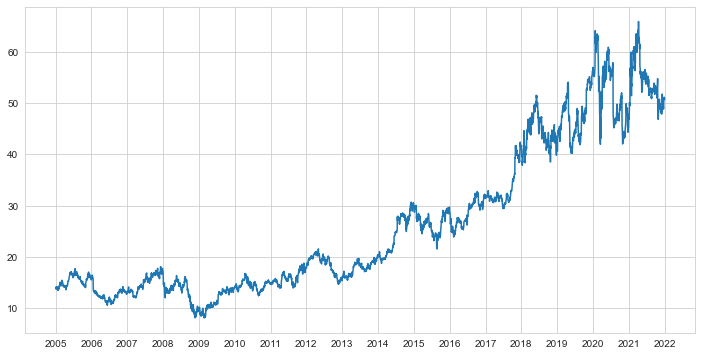

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(intc.index,intc['Adj Close'])
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.show()

## 1. What was the change in price of the stock overtime?

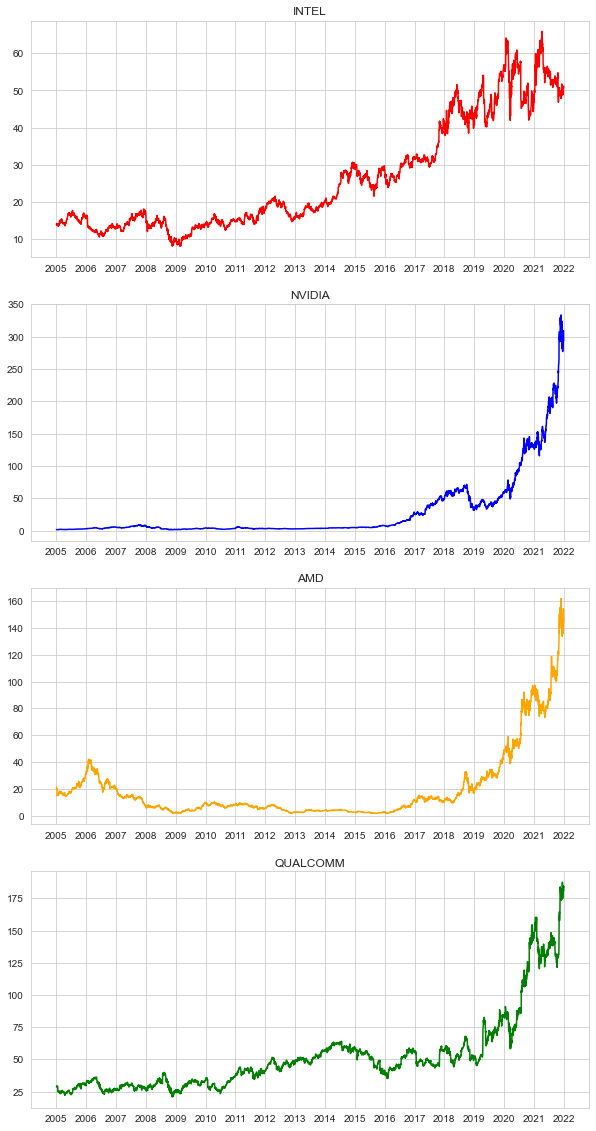

In [11]:
#subplots
fig, ax = plt.subplots(4, 1, figsize=(10,20))


ax[0].plot(intc.index,intc['Adj Close'], c='r')
ax[0].set_title('INTEL')
ax[0].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax[0].xaxis.set_major_locator(mdates.YearLocator())

ax[1].plot(nvda.index,nvda['Adj Close'], c='b')
ax[1].set_title('NVIDIA')
ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax[1].xaxis.set_major_locator(mdates.YearLocator())

ax[2].plot(amd.index,amd['Adj Close'], c='orange')
ax[2].set_title('AMD')
ax[2].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax[2].xaxis.set_major_locator(mdates.YearLocator())

ax[3].plot(qcom.index,qcom['Adj Close'], c='g')
ax[3].set_title('QUALCOMM')
ax[3].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax[3].xaxis.set_major_locator(mdates.YearLocator());

## RESAMPLING
### it involves changing the frequency of the time series observations

In [12]:
intc21= intc.loc[pd.Timestamp('2021-01-01'):pd.Timestamp('2021-12-31')]

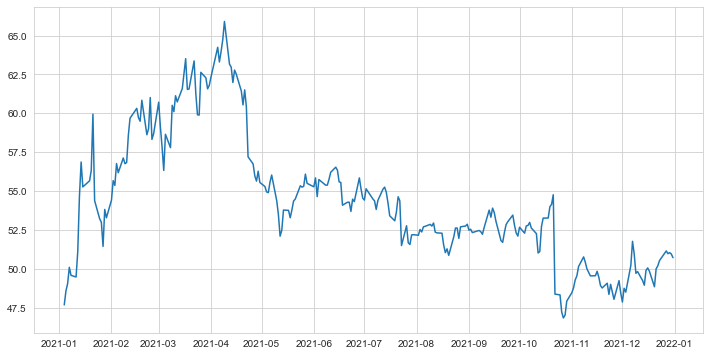

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(intc21.index,intc21['Adj Close'])
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator());

## 2. What was the change in price of the stock over the last year?

In [14]:
nvda21=nvda.loc[pd.Timestamp('2021-01-01'):pd.Timestamp('2021-12-31')]
amd21=amd.loc[pd.Timestamp('2021-01-01'):pd.Timestamp('2021-12-31')]
qcom21=qcom.loc[pd.Timestamp('2021-01-01'):pd.Timestamp('2021-12-31')]

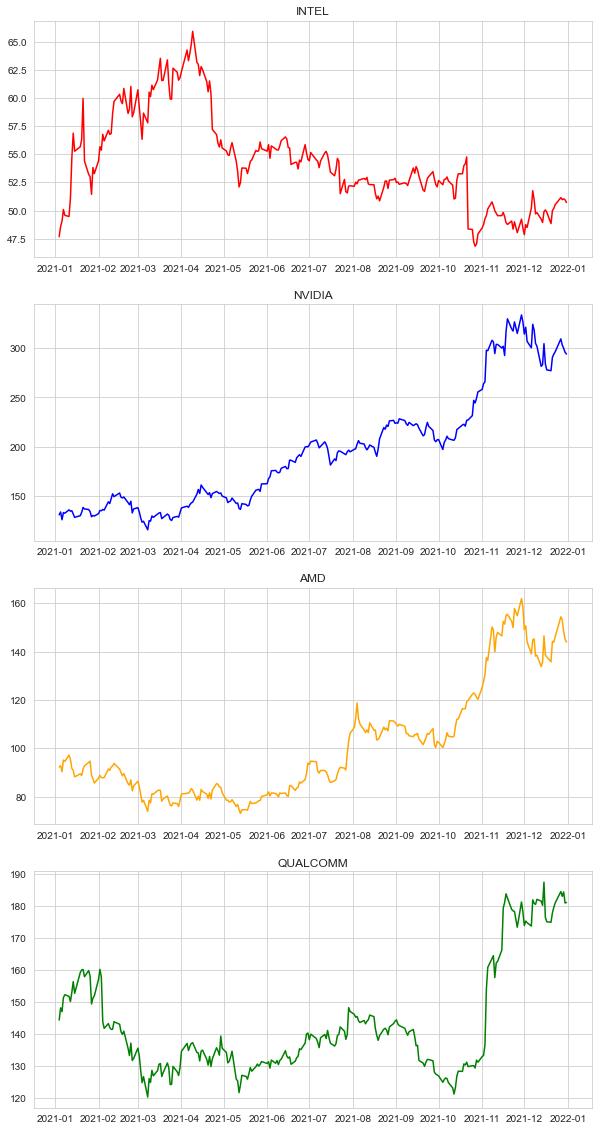

In [15]:
#subplots
fig, ax = plt.subplots(4, 1, figsize=(10,20))


ax[0].plot(intc21.index,intc21['Adj Close'], c='r')
ax[0].set_title('INTEL')
ax[0].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax[0].xaxis.set_major_locator(mdates.MonthLocator())

ax[1].plot(nvda21.index,nvda21['Adj Close'], c='b')
ax[1].set_title('NVIDIA')
ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax[1].xaxis.set_major_locator(mdates.MonthLocator())

ax[2].plot(amd21.index,amd21['Adj Close'], c='orange')
ax[2].set_title('AMD')
ax[2].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax[2].xaxis.set_major_locator(mdates.MonthLocator())

ax[3].plot(qcom21.index,qcom21['Adj Close'], c='g')
ax[3].set_title('QUALCOMM')
ax[3].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax[3].xaxis.set_major_locator(mdates.MonthLocator());

### Daily percentages
Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve the daily returns for the stocks.

In [16]:
daily_per_change_intc= intc['Adj Close'].pct_change()*100
daily_per_change_intc.head()

Date
2005-01-03         NaN
2005-01-04   -1.993914
2005-01-05   -0.973030
2005-01-06    0.312593
2005-01-07    1.513773
Name: Adj Close, dtype: float64

Text(0.5, 1.0, 'INTEL')

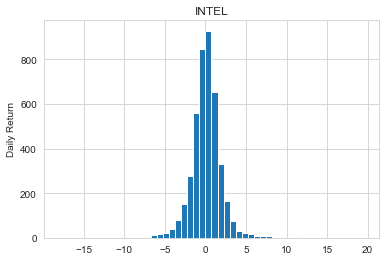

In [17]:
daily_per_change_intc.fillna(0, inplace= True)
daily_per_change_intc.hist(bins=50)
plt.ylabel('Daily Return')
plt.title('INTEL')

In [19]:
daily_per_change_nvda= nvda['Adj Close'].pct_change()*100
daily_per_change_nvda.fillna(0, inplace= True)

daily_per_change_amd= amd['Adj Close'].pct_change()*100
daily_per_change_amd.fillna(0, inplace= True)

daily_per_change_qcom= qcom['Adj Close'].pct_change()*100
daily_per_change_qcom.fillna(0, inplace= True)


E:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warni

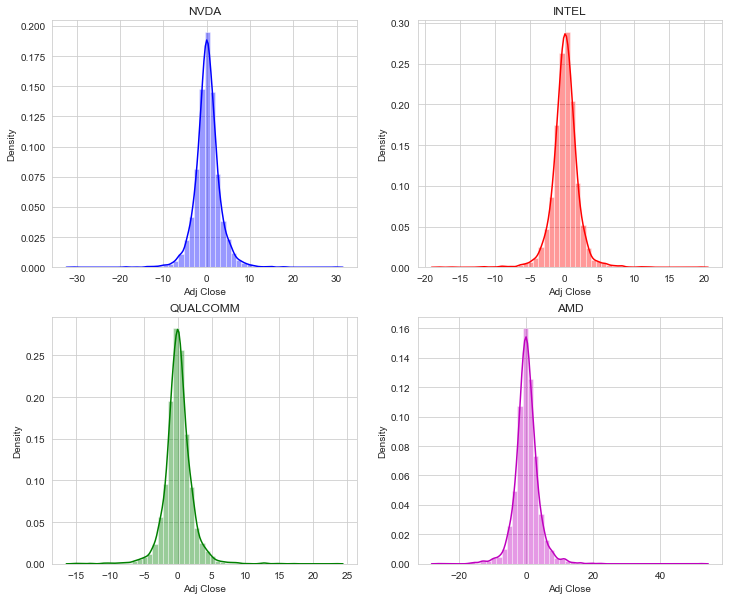

In [24]:
f, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot a simple histogram with binsize determined automatically
sns.distplot(daily_per_change_nvda, color="b", ax=axes[0, 0]);
axes[0,0].set_title('NVDA')
# Plot a kernel density estimate and rug plot
sns.distplot(daily_per_change_intc, color="r", ax=axes[0, 1]);
axes[0,1].set_title('INTEL')
# Plot a filled kernel density estimate
sns.distplot(daily_per_change_qcom, color="g", ax=axes[1, 0]);
axes[1,0].set_title('QUALCOMM')
# Plot a historgram and kernel density estimate
sns.distplot(daily_per_change_amd, color="m", ax=axes[1, 1])
axes[1,1].set_title('AMD');

In [25]:
daily_per_change_intc.mean()

0.04837692219583828

## Inference:
### This is the average daily returns (%) over the entire dataset for intel i.e; 2005-2022
### In other words, if you have invested in intel in 2005, you can expect the value of your investments to have grown 0.048% each day.

## Daily returns mean

<BarContainer object of 4 artists>

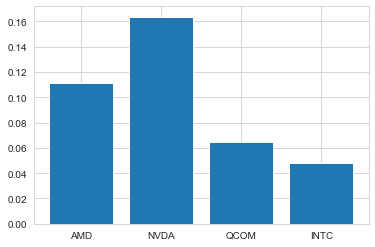

In [26]:
return_mean= { 'AMD': daily_per_change_amd.mean(), 'NVDA': daily_per_change_nvda.mean(),
              'QCOM': daily_per_change_qcom.mean(), 'INTC': daily_per_change_intc.mean()}
plt.bar(range(len(return_mean)), list(return_mean.values()), tick_label =list(return_mean.keys()))

### The average  daily returns (%) is highest for NVIDIA and lowest for INTEL

## Daily returns Standard Deviation

<BarContainer object of 4 artists>

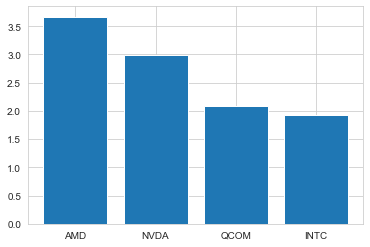

In [27]:

return_std= { 'AMD': daily_per_change_amd.std(), 'NVDA': daily_per_change_nvda.std(),
              'QCOM': daily_per_change_qcom.std(), 'INTC': daily_per_change_intc.std()}
plt.bar(range(len(return_std)), list(return_std.values()), tick_label =list(return_std.keys()))

### “A stock that has high standard deviation experiences higher volatility, and therefore, a higher level of risk is associated with the stock.”

## Inference
###  We can see that the INTEL has the lowest standard deviation. This means the  INTEL is one of the safest investments. but it has the lowest mean i.e; low risk, low return.Whereas, AMD, NVIDIA have high std and high mean i.e; high risk, high return.

##  3.How much value do we put at risk by investing in a particular stock?

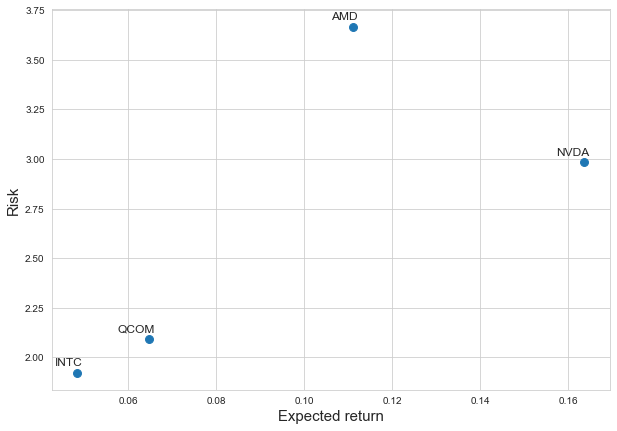

In [28]:
plt.figure(figsize=(10, 7))
area = 3.14 * 20
plt.scatter(list(return_mean.values()), list(return_std.values()), s=area)
plt.xlabel('Expected return',fontsize=15)
plt.ylabel('Risk',fontsize=15)
for label, x, y in zip(list(return_std.keys()), list(return_mean.values()), list(return_std.values())):
    plt.annotate(label, xy=(x, y), xytext=(5,5), textcoords='offset points', ha='right', va='bottom', fontsize=12)

### Plotting risk vs returns only gives you a sense of relative performance between the companies. Common sense dictates that we want to minimize the risk and maximize the returns. 

### Here AMD seems a high risk stock, whereas INTC seems like a low risk, low return stock

## 4.What was the moving average of various stocks?

In [29]:
amd_copy=amd['Adj Close']
amd['20']= amd_copy.rolling(window=20).mean()
amd['50']= amd_copy.rolling(window=50).mean()
amd['252']= amd_copy.rolling(window=252).mean()

nvda_copy=nvda['Adj Close']
nvda['20']= nvda_copy.rolling(window=20).mean()
nvda['50']= nvda_copy.rolling(window=50).mean()
nvda['252']= nvda_copy.rolling(window=252).mean()


intc_copy=intc['Adj Close']
intc['20']= intc_copy.rolling(window=20).mean()
intc['50']= intc_copy.rolling(window=50).mean()
intc['252']= intc_copy.rolling(window=252).mean()


qcom_copy=qcom['Adj Close']
qcom['20']= qcom_copy.rolling(window=20).mean()
qcom['50']= qcom_copy.rolling(window=50).mean()#quarterly
qcom['252']= qcom_copy.rolling(window=252).mean()# year

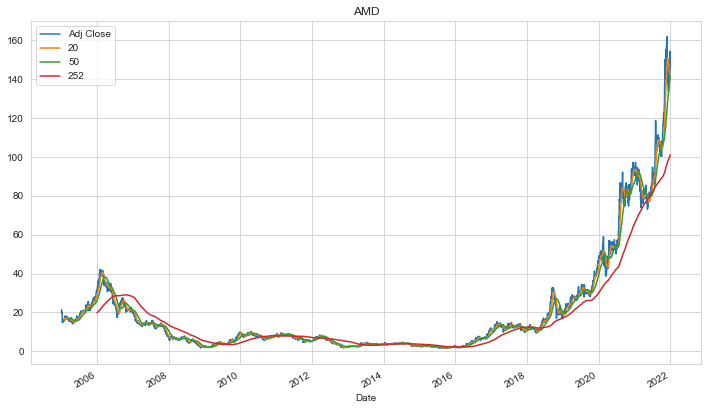

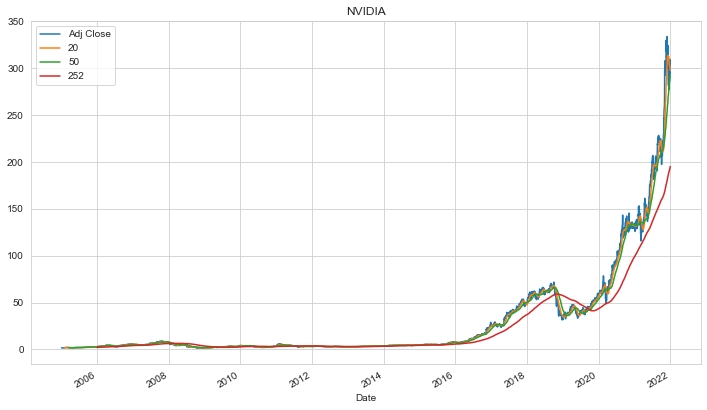

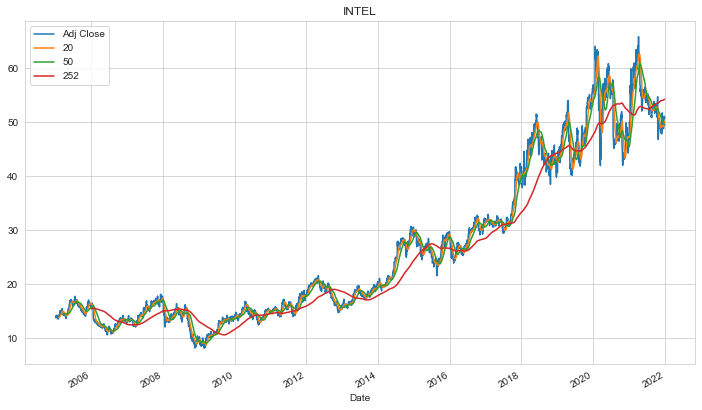

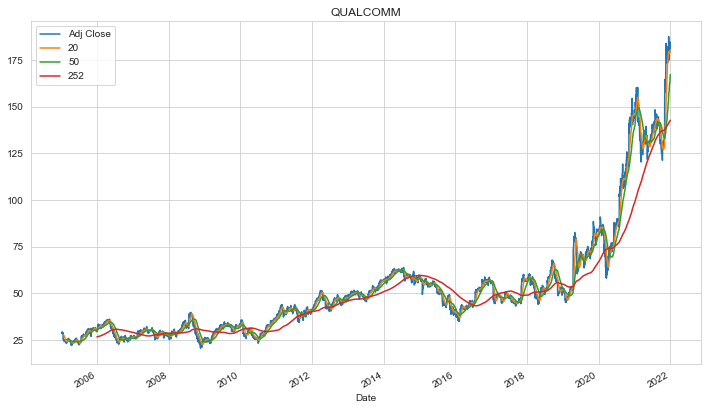

In [30]:


amd[['Adj Close', '20', '50','252']].plot(title="AMD",figsize=(12, 7))
nvda[['Adj Close', '20', '50','252']].plot(title="NVIDIA",figsize=(12, 7))
intc[['Adj Close', '20', '50','252']].plot(title="INTEL",figsize=(12, 7))
qcom[['Adj Close', '20','50' ,'252']].plot(title="QUALCOMM",figsize=(12, 7));

## 5.What was the moving average of the various stocks after covid hit?

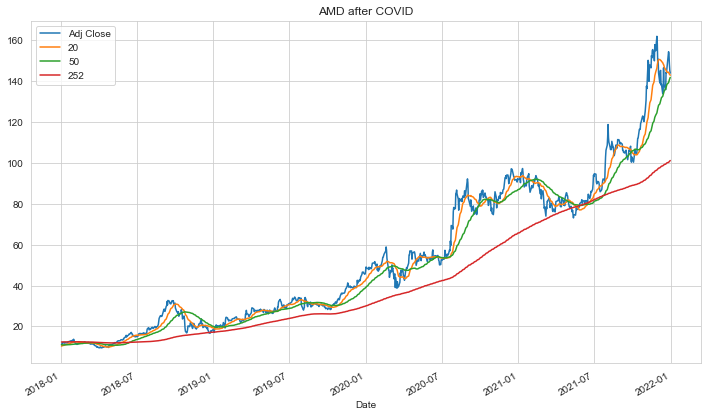

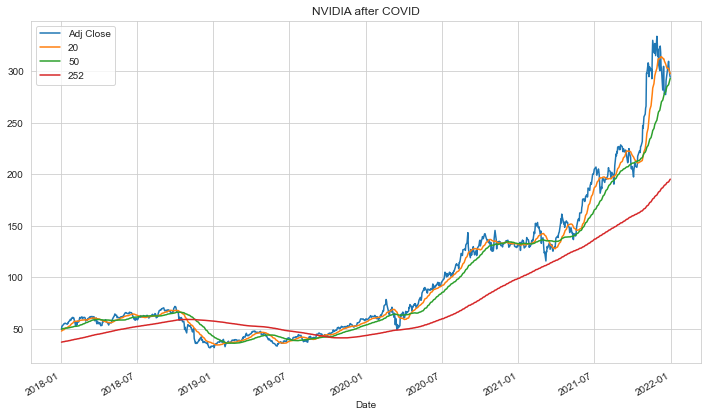

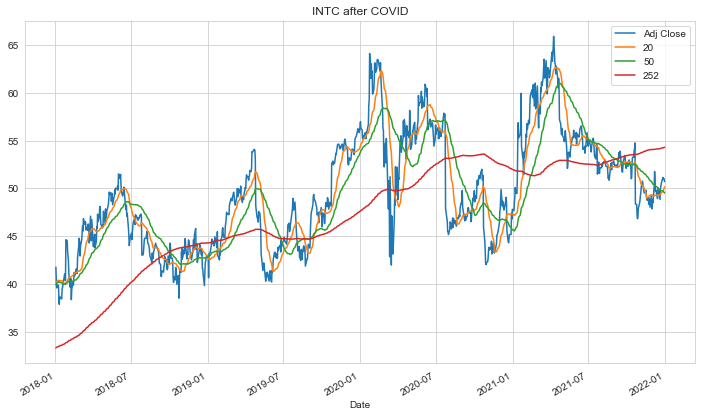

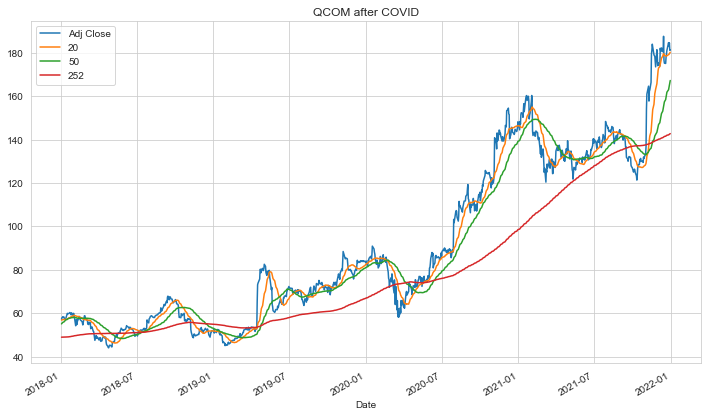

In [31]:
amd.loc['2018-01-01':'2021-12-31'][['Adj Close', '20', '50','252']].plot(title="AMD after COVID",figsize=(12, 7));
nvda.loc['2018-01-01':'2021-12-31'][['Adj Close', '20','50', '252']].plot(title="NVIDIA after COVID",figsize=(12, 7));
intc.loc['2018-01-01':'2021-12-31'][['Adj Close', '20', '50','252']].plot(title="INTC after COVID",figsize=(12, 7));
qcom.loc['2018-01-01':'2021-12-31'][['Adj Close', '20','50', '252']].plot(title="QCOM after COVID",figsize=(12, 7));

## 6. What was the correlation between different stocks closing prices?

In [32]:
df=pd.DataFrame()
df['intc']=daily_per_change_intc
df['nvda']=daily_per_change_nvda
df['amd']=daily_per_change_amd
df['qcom']=daily_per_change_qcom
df.head()

,intc,nvda,amd,qcom
Date,,,,
2005-01-03,0.000000,0.000000,0.000000,0.000000
2005-01-04,-1.993914,-4.707379,-5.604862,-0.448972
2005-01-05,-0.973030,0.934606,-2.276096,0.427284
2005-01-06,0.312593,-0.969974,-0.151904,1.630783
2005-01-07,1.513773,-1.914612,1.014204,0.511633


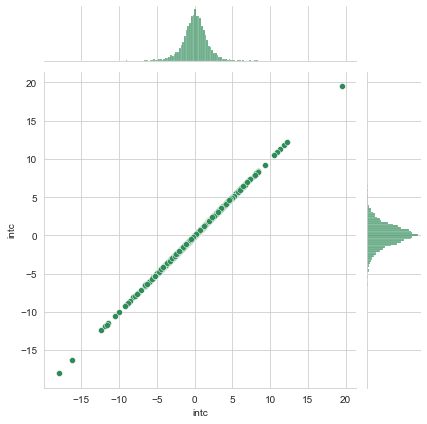

In [33]:
sns.color_palette("husl", 9)
# Comparing intel to itself should show a perfectly linear relationship
sns.jointplot(x=df['intc'], y=df['intc'],  kind='scatter', color='seagreen')

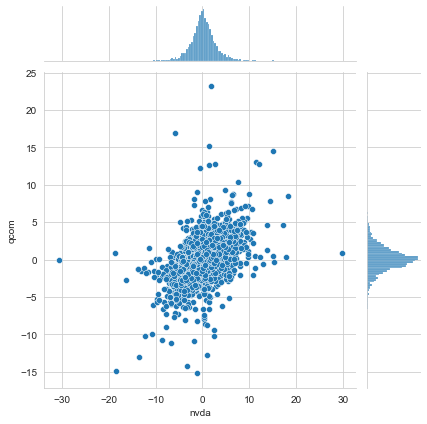

In [34]:
#lets compare daily returns of 2 different stocks
sns.jointplot(x=df['nvda'], y=df['qcom'], kind='scatter')

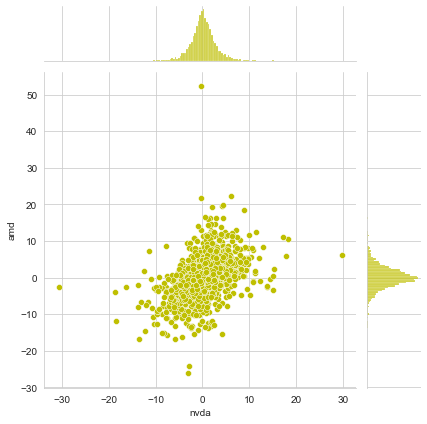

In [35]:
sns.jointplot(x=df['nvda'], y=df['amd'], kind='scatter',color='y')

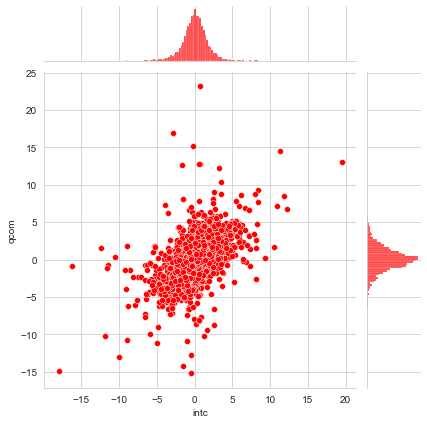

In [36]:
sns.jointplot(x=df['intc'], y=df['qcom'], kind='scatter',color='r')